<a href="https://colab.research.google.com/github/Kateriiina/Lesson/blob/main/Lab3_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/ccFraud.csv')

In [4]:
df = pd.DataFrame(data)
print(df)

           custID  gender  state  cardholder  balance  numTrans  numIntlTrans  \
0               1       1     35           1     3000         4            14   
1               2       2      2           1        0         9             0   
2               3       2      2           1        0        27             9   
3               4       1     15           1        0        12             0   
4               5       1     46           1        0        11            16   
...           ...     ...    ...         ...      ...       ...           ...   
9999995   9999996       1     37           1        0        10             0   
9999996   9999997       1     16           1        0        33             2   
9999997   9999998       1     24           1     9000        38             0   
9999998   9999999       1     28           1     7000        20            19   
9999999  10000000       1     23           1        0        13             0   

         creditLine  fraudR

In [5]:
# Зменшення розміру даних до 10 000
df = df.sample(n=10000, random_state=42)

In [6]:
# Стовпці для нормалізації
columns_to_normalize = ['balance', 'numTrans','numIntlTrans', 'creditLine']

scaler_minmax = MinMaxScaler().fit_transform(df[columns_to_normalize].values)
credit = df.copy()
credit[columns_to_normalize] = scaler_minmax

# Результати нормалізації для порівняння
print("\nДані після мін-макс нормалізації:")
credit.head(10)


Дані після мін-макс нормалізації:


,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
919213,919214,1,35,1,0.177997,1.00,0.066667,1.000000,1
9467153,9467154,2,43,1,0.205698,0.03,0.000000,0.054054,0
6585777,6585778,1,25,1,0.550242,0.01,0.000000,0.486486,1
3878022,3878023,1,35,1,0.274264,0.43,0.000000,0.081081,0
5537116,5537117,2,49,1,0.377113,0.18,0.000000,0.121622,0
5893459,5893460,2,29,1,0.171415,0.20,0.100000,0.040541,0
8653685,8653686,2,7,1,0.274264,0.54,0.000000,0.081081,0
6880281,6880282,1,2,1,0.205698,0.41,0.000000,0.054054,0
9478495,9478496,1,9,1,0.029518,0.13,0.083333,0.040541,0
2930982,2930983,1,29,1,0.067160,0.17,0.000000,0.067568,0


In [7]:
X = credit.drop(['custID', 'fraudRisk'], axis=1)
y = credit['fraudRisk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

0.943
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2835
           1       0.48      0.58      0.53       165

    accuracy                           0.94      3000
   macro avg       0.73      0.77      0.75      3000
weighted avg       0.95      0.94      0.95      3000



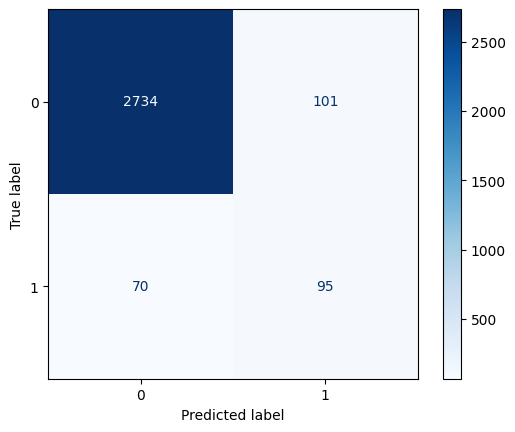

In [8]:
# Побудова моделі з параметрами за замовчуванням
tree_model = DecisionTreeClassifier(random_state=17)

# Навчання моделі на тренувальних даних
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)
print(accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))
#plot_confusion_matrix(dg_tree, X_test, y_test, cmap = 'Green')

disp = ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap = plt.cm.Blues)
#print(disp.confusion_matrix)

In [9]:

# Задаємо параметри для пошуку
param_grid = {'max_depth': [1, 2, 3, 5, 10], 'max_features': [2, 3, 5, 7]}

# Пошук найкращих параметрів за допомогою крос-валідації
grid_search = GridSearchCV(tree_model, param_grid, cv=5, n_jobs=-1, verbose=True)
grid_search.fit(X_train, y_train)

# Виведення найкращих параметрів та точності моделі
print("Найкращі параметри:", grid_search.best_params_)
print("Точність моделі з найкращими параметрами:", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Найкращі параметри: {'max_depth': 3, 'max_features': 5}
Точність моделі з найкращими параметрами: 0.9515714285714285


In [10]:
#dg_tree_val = DecisionTreeClassifier(max_depth=10, max_features=50,random_state=17)

# Побудова моделі з найкращими параметрами
best_tree_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], max_features=grid_search.best_params_['max_features'],random_state=17)

# Навчання моделі на тренувальних даних
best_tree_model.fit(X_train, y_train)

treee_pred = best_tree_model.predict(X_test)
print(accuracy_score(y_test, treee_pred))
print(classification_report(y_test, treee_pred))
#plot_confusion_matrix(dg_tree, X_test, y_test, cmap = 'Greens')


0.9506666666666667
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2835
           1       0.56      0.50      0.53       165

    accuracy                           0.95      3000
   macro avg       0.76      0.74      0.75      3000
weighted avg       0.95      0.95      0.95      3000



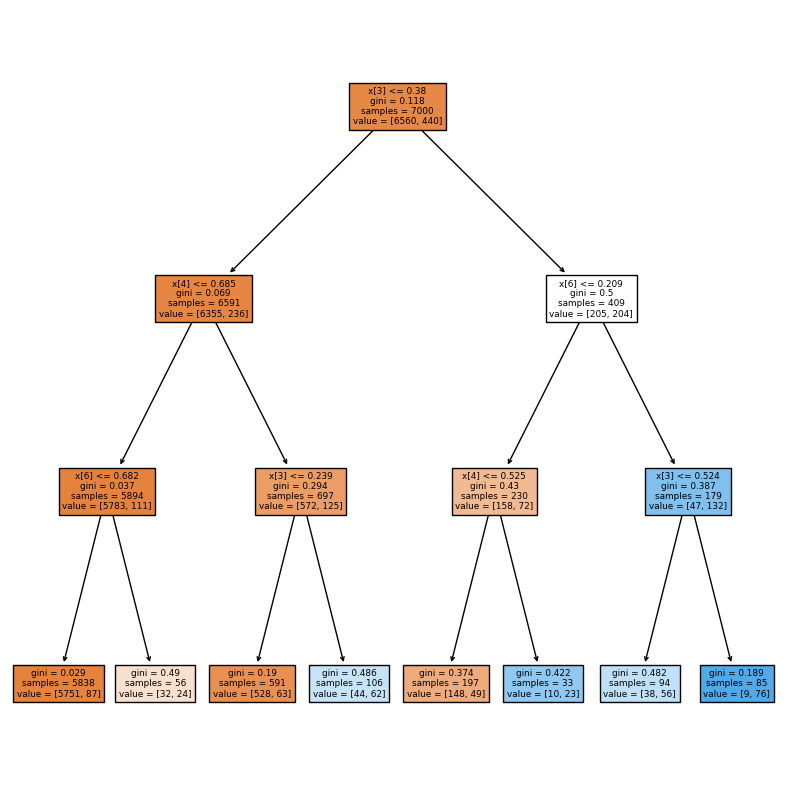

In [11]:
from sklearn.tree import plot_tree

# Візуалізація дерева
plt.figure(figsize=(10, 10))
plot_tree(best_tree_model, filled=True)
plt.show()

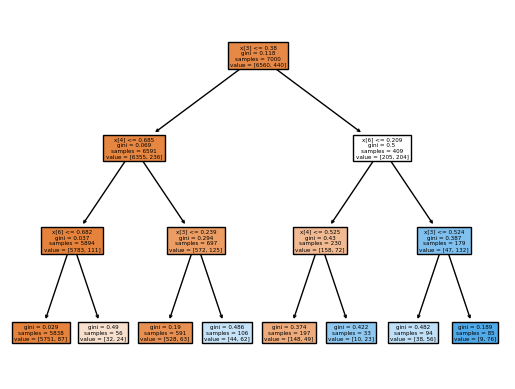

In [12]:
from sklearn import tree

tree.plot_tree(best_tree_model, filled=True)
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Побудова моделі з параметрами за замовчуванням
forest_model = RandomForestClassifier(random_state = 0)
forest_model.fit(X_train, y_train)

forest_pred = forest_model.predict(X_test)
print("Score at the training set: {:.3f}".format(forest_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(forest_model.score(X_test, y_test)))
print(classification_report(y_test, forest_pred))
#plot_confusion_matrix(forest_model, X_test, y_test, cmap = 'Greens')

Score at the training set: 0.999
Score at the test set: 0.959
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2835
           1       0.68      0.50      0.57       165

    accuracy                           0.96      3000
   macro avg       0.82      0.74      0.78      3000
weighted avg       0.96      0.96      0.96      3000



In [14]:
# Задаємо параметри для пошуку
forest_params = {'n_estimators' : [10, 50, 100, 200]}

forest_grid = GridSearchCV(forest_model, forest_params, cv=5, n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)

print("Best parameters are ", forest_grid.best_params_)
print("Best score is ", forest_grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters are  {'n_estimators': 100}
Best score is  0.9531428571428572


In [17]:
# Побудова моделі з найкращим значенням параметру
best_forest_model = RandomForestClassifier(n_estimators=200, random_state = 0)

# Навчання моделі на тренувальних даних
best_forest_model.fit(X_train, y_train)

foresst_pred = best_forest_model.predict(X_test)
print(accuracy_score(y_test, foresst_pred))
print(classification_report(y_test, foresst_pred))
#plot_confusion_matrix(forest_model_best, X_test, y_test, cmap = 'Greens')

0.9596666666666667
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2835
           1       0.68      0.50      0.58       165

    accuracy                           0.96      3000
   macro avg       0.83      0.74      0.78      3000
weighted avg       0.96      0.96      0.96      3000



In [24]:
# Визначення важливості ознак
importance = best_tree_model.feature_importances_
for i, val in enumerate(importance):
    print("Ознака {}: {:.3f}".format(i+1, val))

Ознака 1: 0.000
Ознака 2: 0.000
Ознака 3: 0.000
Ознака 4: 0.684
Ознака 5: 0.139
Ознака 6: 0.000
Ознака 7: 0.177


In [25]:
from sklearn.svm import SVC

# Побудова моделей з різними функціями ядра
linear_model = SVC(kernel='linear')
rbf_model = SVC(kernel='rbf')
poly_model = SVC(kernel='poly')

# Навчання моделей на тренувальних даних
linear_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)
poly_model.fit(X_train, y_train)


print("Точність моделі з лінійною функцією ядра:")
print("Score at the training set: {:.3f}".format(linear_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(linear_model.score(X_test, y_test)))
print()

print("Точність моделі з радіально-базисною функцією ядра:")
print("Score at the training set: {:.3f}".format(rbf_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(rbf_model.score(X_test, y_test)))
print()

print("Точність моделі з поліноміальною функцією ядра:")
print("Score at the training set: {:.3f}".format(poly_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(poly_model.score(X_test, y_test)))

Точність моделі з лінійною функцією ядра:
Score at the training set: 0.957
Score at the test set: 0.962

Точність моделі з радіально-базисною функцією ядра:
Score at the training set: 0.937
Score at the test set: 0.945

Точність моделі з поліноміальною функцією ядра:
Score at the training set: 0.937
Score at the test set: 0.945


In [26]:
best_model = None
best_accuracy = 0
best_C = None
for C_value in [1, 10, 100]:
    svm = SVC(kernel='linear', C=C_value)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = svm
        best_C = C_value

print(f"Best C value: {best_C}")
print("Accuracy for the best model:", best_accuracy)
print("Classification report for the best model:\n", classification_report(y_test, best_model.predict(X_test)))

Best C value: 10
Accuracy for the best model: 0.9633333333333334
Classification report for the best model:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2835
           1       0.78      0.46      0.58       165

    accuracy                           0.96      3000
   macro avg       0.88      0.73      0.78      3000
weighted avg       0.96      0.96      0.96      3000



In [27]:
best_model = None
best_accuracy = 0
best_C = None
for C_value in [1, 10, 100]:
    svm = SVC(kernel='rbf', C=C_value)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = svm
        best_C = C_value

print(f"Best C value: {best_C}")
print("Accuracy for the best model:", best_accuracy)
print("Classification report for the best model:\n", classification_report(y_test, best_model.predict(X_test)))

Best C value: 100
Accuracy for the best model: 0.9586666666666667
Classification report for the best model:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2835
           1       0.92      0.27      0.42       165

    accuracy                           0.96      3000
   macro avg       0.94      0.64      0.70      3000
weighted avg       0.96      0.96      0.95      3000



In [28]:
best_model = None
best_accuracy = 0
best_C = None
for C_value in [1, 10, 100]:
    svm = SVC(kernel='poly', C=C_value)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = svm
        best_C = C_value

print(f"Best C value: {best_C}")
print("Accuracy for the best model:", best_accuracy)
print("Classification report for the best model:\n", classification_report(y_test, best_model.predict(X_test)))

Best C value: 100
Accuracy for the best model: 0.952
Classification report for the best model:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      2835
           1       0.82      0.16      0.27       165

    accuracy                           0.95      3000
   macro avg       0.89      0.58      0.62      3000
weighted avg       0.95      0.95      0.94      3000

